In [115]:
import requests
import re
from collections import OrderedDict
import json
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# Current Temperature
w_now = "https://api2.sktelecom.com/weather/current/minutely?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
resp = requests.get(w_now).json()
NOW_Temp = float(resp["weather"]["minutely"][0]["temperature"]["tc"])
NOW_Time = resp["weather"]["minutely"][0]["timeObservation"]

In [117]:
# 10-Days Temperature Forecast
weather10 = "https://api2.sktelecom.com/weather/forecast/6days?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
response = requests.get(weather10).json()
result = response["weather"]["forecast6days"][0]["temperature"]
time0 = response["weather"]["forecast6days"][0]["timeRelease"]

# determinant (Max or Min)
p=-1
# 2D lists
item=[[],[]] #Min&Max Temperature Lists
ind=[[],[]]  #INDEX Lists

# Sort the result values in order
r = OrderedDict(sorted(result.items(), key=lambda t:t[0]))


count=0 #count the number of elements

for i in range(len(r)):
    it = r.popitem()
    pattern = re.compile(r'\d+')
    key = it[0]
    search = pattern.search(key)
    hour = int(search.group(0))
    temp = int(it[1])
    
    # Max of Min determinant i.e "tmin2day" or "tmax2day"  
    p = 0 if key[2] is 'i' else 1

    if len(ind[p]) is 0:
        ind[p].append(hour)
        item[p].append(temp)
    else:
        j=0
        while j<8 and hour > ind[p][j]:
            j+=1
        ind[p].insert(j, hour)
        item[p].insert(j, temp)

print("Max: ", item[1], len(item[1]))
print("Min: ", item[0], len(item[0]))

Max:  [7, 7, 5, 6, 4, 5, 8, 8, 9] 9
Min:  [-4, -4, -5, -2, -4, -5, -4, -4, -5] 9


In [118]:
# 3-Days Temperature Forecast
weather3 = "https://api2.sktelecom.com/weather/forecast/3days?ver=1&lat=36.5038&lon=127.4166&appKey=84ccae67-8c6b-4269-8b4d-9131c5eae607"
response3 = requests.get(weather3).json()
result3 = response3["weather"]["forecast3days"][0]["fcst3hour"]["temperature"]
time = response3["weather"]["forecast3days"][0]["timeRelease"]

item3=[] #Temperature List
ind3=[] #INDEX List
count=0 #count the number of elements

for i in range(len(result3)):
    it = result3.popitem()
    
    # KEY
    key = it[0]
    pattern = re.compile(r'\d+')
    search = pattern.search(key)
    
    # HOUR
    hour = int(search.group(0))
    
    # if the VALUE is not an Empty String
    if it[1] is not '':
        temp = float(it[1])
        # if the INDEX List is empty, just append the hour&temp to the correct list
        if len(ind3) is 0:
            ind3.append(hour)
            item3.append(temp)
            # don't increment count here. 
        # if the INDEX List is not empty, maneuver the sorted list to find the correct position(j)
        else:
            j=0
            # this sorts everything, even if the returned json is unsorted
            while hour > ind3[j]:
                j+=1
            # insert the hour/temp value at the right position
            ind3.insert(j, hour)
            item3.insert(j, temp)
            count+=1 #start incrementing count from here.
            
    # if the Value is an Empty String, just skip
    else:
        continue

print("Index: ", ind3, len(ind3))
print("Temp: ", item3, len(item3))

Index:  [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58] 19
Temp:  [6.0, 1.0, -1.0, -4.0, -6.0, -4.0, 1.0, 4.0, 0.0, -3.0, -4.0, -5.0, -6.0, -4.0, 3.0, 6.0, 2.0, -2.0, -2.0] 19


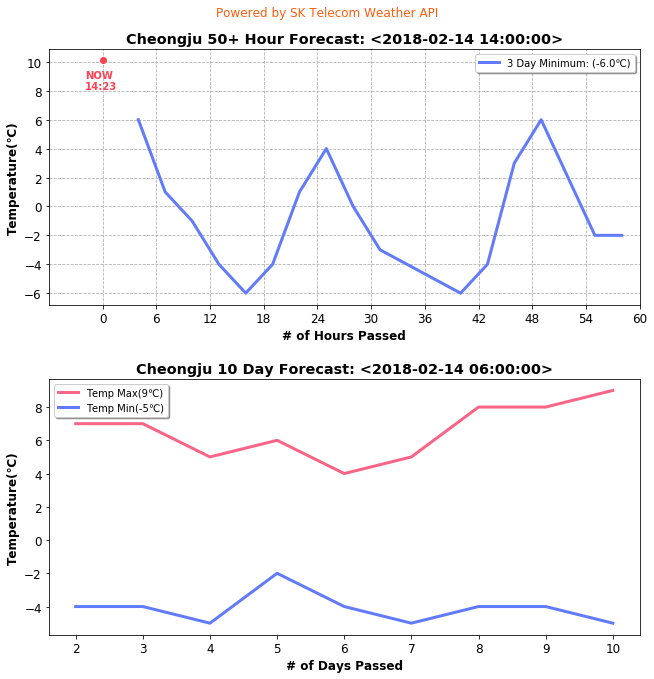

In [119]:
# Draw Graph
plt.figure(figsize=(10,10))

# First Graph
plt.subplot(211)
plt.title('Cheongju 50+ Hour Forecast: <{0}>'.format(time), fontweight='bold', fontsize='x-large')
lowest = min(item3)
plt.plot(ind3, item3, "#617bfb", label='3 Day Minimum: ({0}\u2103)'.format(lowest), linewidth=3)
plt.legend(shadow=True)
plt.xlabel("# of Hours Passed", fontsize='large', fontweight='bold')
plt.ylabel("Temperature(\u2103)", fontsize='large', fontweight='bold')
plt.xlim(-6, ind3[count]) # x-axis min/max limits
plt.xticks(np.arange(0, ind3[count]+6, 6), fontsize='large')
plt.yticks(fontsize='large')
plt.grid(linestyle='--')

# Annotate "NOW"
plt.plot(0, NOW_Temp, 'o', color='#ff4253')
plt.text(-2, NOW_Temp-2, "NOW\n{0}".format(NOW_Time[11:16]), color='#ff4253', fontweight='bold')

# Second Graph
plt.subplot(212)
plt.title('Cheongju 10 Day Forecast: <{0}>'.format(time0), fontweight='bold', fontsize='x-large')
maximum = max(item[1])
minimum = min(item[0])
plt.plot(ind[1], item[1], '#f86586', label='Temp Max({0}\u2103)'.format(maximum), linewidth=3)
plt.plot(ind[0], item[0], "#617bfb", label='Temp Min({0}\u2103)'.format(minimum), linewidth=3)
plt.legend(shadow=True)
plt.xlabel("# of Days Passed", fontsize='large', fontweight='bold')
plt.ylabel("Temperature(\u2103)", fontsize='large', fontweight='bold')
plt.xticks(np.arange(2, 11), fontsize='large')
plt.yticks(fontsize='large')

plt.suptitle('Powered by SK Telecom Weather API', color='#fc5f10')

#padding
plt.tight_layout(pad=4, w_pad=1, h_pad=2)

plt.savefig('Forecast_{0}.png'.format(time))
plt.show()